Training score: 0.7881
Test score: 0.7880
F1-score: 0.6353
AUC Score: 0.8527

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2014
           1       0.73      0.56      0.64       986

    accuracy                           0.79      3000
   macro avg       0.77      0.73      0.74      3000
weighted avg       0.78      0.79      0.78      3000

AUC Score: 0.8527


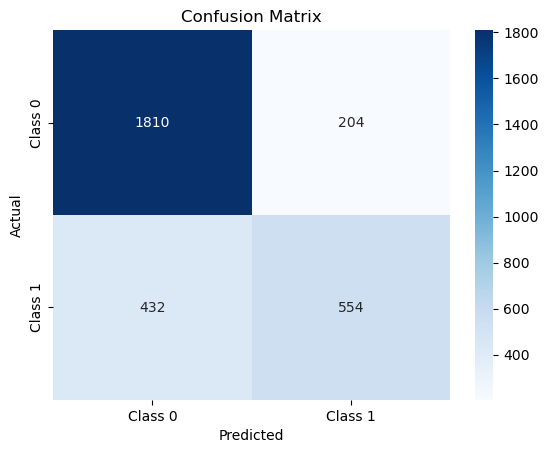

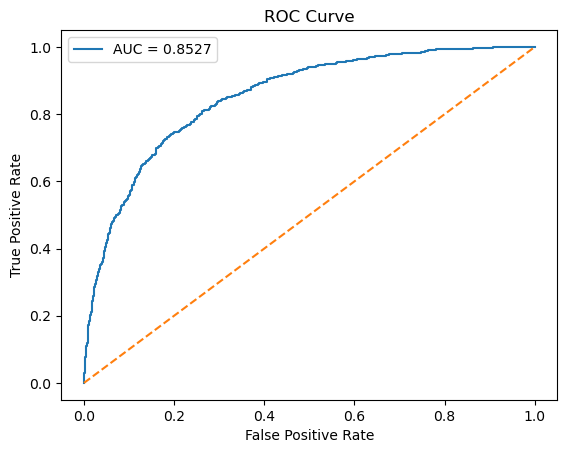

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score

data = pd.read_csv('diabetes (2).csv')  

X = data.drop(columns=['Diabetic'])
y = data['Diabetic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5))  
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"Training score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")


y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]
# Obliczam F1-score i AUC dla Logistic Regression + Pipeline
f1_pipeline = f1_score(y_test, y_pred)
auc_pipeline = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1_pipeline:.4f}")
print(f"AUC Score: {auc_pipeline:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Wnioski: üîπ Accuracy: 78.8% ‚Üí To oznacza, ≈ºe model klasyfikuje poprawnie prawie 8 na 10 przypadk√≥w.

üîπ F1-score dla klasy 1 (Diabetic): 0.64 ‚Üí Model nieco gorzej wykrywa pacjent√≥w chorych na cukrzycƒô (Recall = 0.56 oznacza, ≈ºe prawie po≈Çowa przypadk√≥w cukrzycy jest pominiƒôta).

üîπ Macierz pomy≈Çek (Confusion Matrix):

Model dobrze klasyfikuje zdrowych pacjent√≥w (81% Precision).
Cukrzycy sƒÖ trudniejsi do wykrycia (Precision = 73%, ale Recall = 56%).

üîπ AUC = 0.8527 ‚Üí To ca≈Çkiem dobry wynik, co oznacza, ≈ºe model do≈õƒá dobrze r√≥znicuje klasy.



Por√≥wnuje model z modelem z zadania 14.3 

                            Model  F1-score     AUC
0     Logistic Regression (L1/L2)    0.5809  0.8165
1  Logistic Regression + Pipeline    0.6353  0.8527


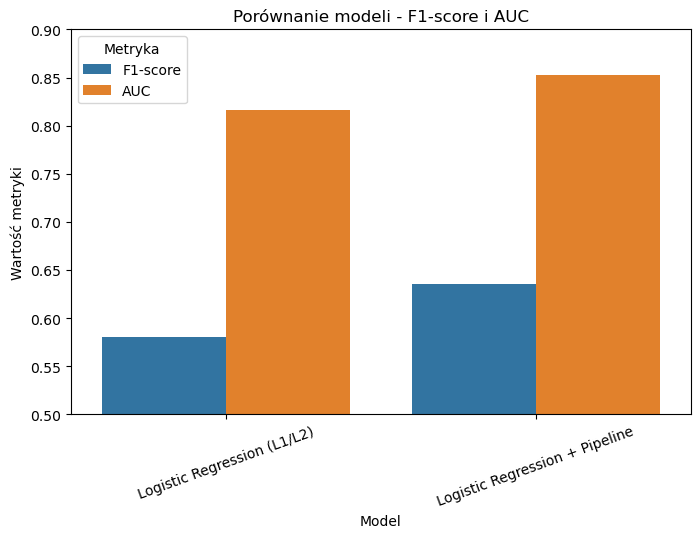

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Zapisuje wyniki do zmiennych
f1_L1_L2 = 0.5809  
auc_L1_L2 = 0.8165

f1_pipeline = 0.6353 
auc_pipeline = 0.8527

# Tworze DataFrame z wynikami modeli przy u≈ºyciu zmiennych
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression (L1/L2)", "Logistic Regression + Pipeline"],
    "F1-score": [f1_L1_L2, f1_pipeline],  
    "AUC": [auc_L1_L2, auc_pipeline]      
})

# Wy≈õwietlamy tabelƒô wynik√≥w
print(comparison_df)

# Wizualizacja wynik√≥w
plt.figure(figsize=(8,5))
sns.barplot(data=comparison_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Por√≥wnanie modeli - F1-score i AUC")
plt.xlabel("Model")
plt.ylabel("Warto≈õƒá metryki")
plt.ylim(0.5, 0.9)  # Ustawienie skali dla czytelno≈õci
plt.legend(title="Metryka")
plt.xticks(rotation=20)
plt.show()


Wnioski: Model, kt√≥ry wykorzystuje Pipeline, dzia≈Ça lepiej ni≈º zwyk≈Ça regresja logistyczna ‚Äì skuteczniej wykrywa cukrzycƒô i lepiej rozr√≥≈ºnia zdrowych i chorych pacjent√≥w. Dziƒôki odpowiedniemu przygotowaniu danych (skalowanie, PCA, kodowanie kategorii) uzyskano wy≈ºszy wynik F1-score (0.6353 vs. 0.5809) oraz lepszƒÖ zdolno≈õƒá rozr√≥≈ºniania klas (AUC: 0.8527 vs. 0.8165). 